Tip: Use a CPU engine while writing the code and once you know the code works, use a GPU engine to train the model. (Runtime -> Change runtime type). This is because you should not ask for a GPU if you do not need it (you only need it when training a model).

# Install the Libraries

In [1]:
!pip install transformers
!pip install datasets
!pip install huggingface_hub

     ---------------------------------------- 0.0/8.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.2 MB 435.7 kB/s eta 0:00:19
      --------------------------------------- 0.2/8.2 MB 2.1 MB/s eta 0:00:04
     - -------------------------------------- 0.4/8.2 MB 2.6 MB/s eta 0:00:04
     --- ------------------------------------ 0.6/8.2 MB 3.3 MB/s eta 0:00:03
     ---- ----------------------------------- 0.9/8.2 MB 3.9 MB/s eta 0:00:02
     ------ --------------------------------- 1.3/8.2 MB 4.6 MB/s eta 0:00:02
     ------ --------------------------------- 1.4/8.2 MB 4.3 MB/s eta 0:00:02
     --------- ------------------------------ 1.9/8.2 MB 4.8 MB/s eta 0:00:02
     ----------- ---------------------------- 2.3/8.2 MB 5.4 MB/s eta 0:00:02
     ------------- -------------------------- 2.7/8.2 MB 5.6 MB/s eta 0:00:01
     --------------- ------------------------ 3.1/8.2 MB 6.0 MB/s eta 0:00:0


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/507.1 kB ? eta -:--:--
      --------------------------------------- 10.2/507.1 kB ? eta -:--:--
     -- ---------------------------------- 41.0/507.1 kB 495.5 kB/s eta 0:00:01
     ------------- ------------------------ 174.1/507.1 kB 1.5 MB/s eta 0:00:01
     ----------------------------- -------- 399.4/507.1 kB 2.5 MB/s eta 0:00:01
     -------------------------------------- 507.1/507.1 kB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/367.1 kB ? eta -:--:--
     -------------------------------------  358.4/367.1 kB 7.4 MB/s eta 0:00:01
     -------------------------------------- 367.1/367.1 kB 7.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/115.3 kB ? eta -:--:--
     -------------------------------------- 115.3/115.3 kB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/24.6 MB ? eta -:--:--
      --------------------------------------- 0.3/24.6 MB 9.6 MB/s eta 0:00


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
model_name = "microsoft/xtremedistil-l6-h256-uncased"
# model_name = "microsoft/xtremedistil-l12-h384-uncased"
# model_name = "microsoft/xtremedistil-l6-h384-uncased"
# model_name = "distilbert-base-uncased"
# model_name = "microsoft/MiniLM-L12-H384-uncased"
# model_name = "huawei-noah/TinyBERT_General_4L_312D"
# model_name = "huawei-noah/TinyBERT_General_6L_768D"
# model_name = "distilroberta-base"

In [4]:
!pip install torch

     ---------------------------------------- 0.0/192.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/192.3 MB ? eta -:--:--
     -------------------------------------- 0.0/192.3 MB 495.5 kB/s eta 0:06:29
     ---------------------------------------- 0.3/192.3 MB 2.5 MB/s eta 0:01:16
     ---------------------------------------- 0.8/192.3 MB 4.7 MB/s eta 0:00:42
     ---------------------------------------- 1.1/192.3 MB 5.0 MB/s eta 0:00:39
     ---------------------------------------- 1.5/192.3 MB 5.8 MB/s eta 0:00:34
     ---------------------------------------- 1.9/192.3 MB 5.9 MB/s eta 0:00:33
     ---------------------------------------- 2.3/192.3 MB 6.2 MB/s eta 0:00:31
      --------------------------------------- 2.7/192.3 MB 6.5 MB/s eta 0:00:30
      --------------------------------------- 3.2/192.3 MB 6.7 MB/s eta 0:00:29
      --------------------------------------- 3.4/192.3 MB 6.6 MB/s eta 0:00:29
      --------------------------------------- 3.7/192.


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import datasets
import gzip
import json
from matplotlib import pyplot as plt
import torch
from torch.optim import AdamW
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModelForQuestionAnswering, get_scheduler
from huggingface_hub import notebook_login

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

c:\Users\adity\Anaconda3\envs\test_env2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 1. Data and Model Preparation 

## 1.1. Set the seed
This will ensure the reproducibility of your code in other devices

In [2]:
seed = 123
torch.manual_seed(seed)

## 1.2 Load the Dataset
We will use the the well-known MRQA 2019 Shared Task in this homework. Download your assigned dataset from https://github.com/mrqa/MRQA-Shared-Task-2019. Hint, you can use
```
!wget https://....
```
 to download it directly into your colab instance. Please note that the data is not stored across sessions.

You should use your the training set to train your model and the dev set to evaluate it. 

**Do not use the dev set in the training phase!**

In [7]:
# download your dataset

# SQuaD
!wget https://s3.us-east-2.amazonaws.com/mrqa/release/v2/train/SQuAD.jsonl.gz -O squad_train.jsonl.gz
!wget https://s3.us-east-2.amazonaws.com/mrqa/release/v2/dev/SQuAD.jsonl.gz -O squad_dev.jsonl.gz
# NewsQA
# !wget https://s3.us-east-2.amazonaws.com/mrqa/release/v2/train/NewsQA.jsonl.gz -O newsqa_train.jsonl.gz
# !wget https://s3.us-east-2.amazonaws.com/mrqa/release/v2/dev/NewsQA.jsonl.gz -O newsqa_dev.jsonl.gz
# TriviaQA
# !wget https://s3.us-east-2.amazonaws.com/mrqa/release/v2/train/TriviaQA-web.jsonl.gz -O triviaqa_train.jsonl.gz
# !wget https://s3.us-east-2.amazonaws.com/mrqa/release/v2/dev/TriviaQA-web.jsonl.gz -O triviaqa_dev.jsonl.gz
# SearchQA
# !wget https://s3.us-east-2.amazonaws.com/mrqa/release/v2/train/SearchQA.jsonl.gz -O searchqa_train.jsonl.gz
# !wget https://s3.us-east-2.amazonaws.com/mrqa/release/v2/dev/SearchQA.jsonl.gz -O searchqa_dev.jsonl.gz
# HotpotQA
# !wget https://s3.us-east-2.amazonaws.com/mrqa/release/v2/train/HotpotQA.jsonl.gz -O hotpotqa_train.jsonl.gz
# !wget https://s3.us-east-2.amazonaws.com/mrqa/release/v2/dev/HotpotQA.jsonl.gz -O hotpotqa_dev.jsonl.gz
# NaturalQuestions
# !wget https://s3.us-east-2.amazonaws.com/mrqa/release/v2/train/NaturalQuestionsShort.jsonl.gz -O nq_train.jsonl.gz
# !wget https://s3.us-east-2.amazonaws.com/mrqa/release/v2/dev/NaturalQuestionsShort.jsonl.gz -O nq_dev.jsonl.gz

--2024-01-09 20:18:56--  https://s3.us-east-2.amazonaws.com/mrqa/release/v2/train/SQuAD.jsonl.gz
Resolving s3.us-east-2.amazonaws.com (s3.us-east-2.amazonaws.com)... 52.219.101.89, 52.219.84.98, 52.219.84.170, ...
Connecting to s3.us-east-2.amazonaws.com (s3.us-east-2.amazonaws.com)|52.219.101.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27621835 (26M) [binary/octet-stream]
Saving to: 'squad_train.jsonl.gz'

     0K .......... .......... .......... .......... ..........  0%  420K 64s
    50K .......... .......... .......... .......... ..........  0%  287K 79s
   100K .......... .......... .......... .......... ..........  0%  118K 2m8s
   150K .......... .......... .......... .......... ..........  0%  455K 1m51s
   200K .......... .......... .......... .......... ..........  0% 4,01M 90s
   250K .......... .......... .......... .......... ..........  1%  426K 85s
   300K .......... .......... .......... .......... ..........  1%  800K 78s
   350K ......

In [3]:
def json_to_list(file_name, training=False):
    data = []
    # open file and read lines
    with gzip.open(file_name, mode='rt', encoding='utf-8') as f:
        for example in tqdm(f.readlines()):
            sample = json.loads(example)
            # skip header
            if 'header' in sample:
                continue
            context = sample['context']
            for qas in sample['qas']:
                if training:
                    for answer in qas['detected_answers']:
                        # for training, we need each unique answer text and answer character span
                        #     for each unique question context pair
                        data.append({
                            "question" : qas['question'], 
                            "context" : context, 
                            "answer" : answer['text'], 
                            "answer_span" : answer['char_spans'][0]
                                     })
                else:
                    # for validation, we need each unique question context pair and the corresponding answers and spans and id
                    data.append({"question" : qas['question'], 
                            "context" : context, 
                            "answers" : [x['text'] for x in qas['detected_answers']], 
                            "id" : qas['qid'],
                            "answer_spans" : [x['char_spans'][0][0] for x in qas['detected_answers']]
                                 })
                    
    return data

# Depending on your task, you should download and load a different dataset.
train_data = json_to_list('squad_train.jsonl.gz', training=True)
dev_data = json_to_list('squad_dev.jsonl.gz')

train_dataset = datasets.Dataset.from_dict({'train': train_data})

100%|██████████| 2068/2068 [00:00<00:00, 5439.49it/s]


## 1.3 Load the Model

In [6]:
model = AutoModelForQuestionAnswering.from_pretrained(model_name)

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at microsoft/xtremedistil-l6-h256-uncased and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## 1.3 Load the Tokenizer
Intantiate a tokenizer for your model. Check in the **quicktour** of the **Transformer** **library** for more help https://huggingface.co/docs/transformers/quicktour 

In [7]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 2. Data Preprocessing


## 2.1 Data Exploration
Before jumping into machine learning code, do some data exploration. To train an extractive-QA model we need to use the `question`, `context`/`passage`, and the `answer`. Explore the dataset to learn how to extract these three pieces of information. You should see the first three data instances and print their questions, contexts/passages, and answers.

In [8]:
# data exploration
for i, example in enumerate(train_dataset['train'][:3]):
    print("{}. \nQuestion: {},\nContext: {},\nAnswer: {}".format(i + 1, example['question'], example['context'].replace("\n", ""),
                                                             example['answer']))

1. 
Question: To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?,
Context: Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.,
Answer: Saint Bernadette Soubirous
2. 
Question: What is in front of the Notre Dame Main Building?,
Context: Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a gold

## 2.2 Dataset Encoding
The model should take a question and a context to return an answer. However, we cannot input strings into a Transformer encoder. First, we need to tokenize and encode the text into a format that the model understand. 

The input of most Transformers models are `input_ids`, `token_type_ids`, and `attention_mask`. You should use the tokenizer to obtain this. Note, distilbert does not use `token_type_ids`.

Transform one pair of question-context into features (`input_ids`, `token_type_ids`, and `attention_mask`)

In [9]:
tokenizer(train_dataset['train'][0]['question'], train_dataset['train'][0]['context'], max_length=512, truncation='only_second', padding='max_length')

{'input_ids': [101, 2000, 3183, 2106, 1996, 6261, 2984, 9382, 3711, 1999, 8517, 1999, 10223, 26371, 2605, 1029, 102, 6549, 2135, 1010, 1996, 2082, 2038, 1037, 3234, 2839, 1012, 10234, 1996, 2364, 2311, 1005, 1055, 2751, 8514, 2003, 1037, 3585, 6231, 1997, 1996, 6261, 2984, 1012, 3202, 1999, 2392, 1997, 1996, 2364, 2311, 1998, 5307, 2009, 1010, 2003, 1037, 6967, 6231, 1997, 4828, 2007, 2608, 2039, 14995, 6924, 2007, 1996, 5722, 1000, 2310, 3490, 2618, 4748, 2033, 18168, 5267, 1000, 1012, 2279, 2000, 1996, 2364, 2311, 2003, 1996, 13546, 1997, 1996, 6730, 2540, 1012, 3202, 2369, 1996, 13546, 2003, 1996, 24665, 23052, 1010, 1037, 14042, 2173, 1997, 7083, 1998, 9185, 1012, 2009, 2003, 1037, 15059, 1997, 1996, 24665, 23052, 2012, 10223, 26371, 1010, 2605, 2073, 1996, 6261, 2984, 22353, 2135, 2596, 2000, 3002, 16595, 9648, 4674, 2061, 12083, 9711, 2271, 1999, 8517, 1012, 2012, 1996, 2203, 1997, 1996, 2364, 3298, 1006, 1998, 1999, 1037, 3622, 2240, 2008, 8539, 2083, 1017, 11342, 1998, 1996, 27

Next, we need to create the labels for the model. Since we are creating an extractive model, the labels are the starting and ending indexes. This is not straightforward, so we will use part of HuggingFace's code. This method uses `offset_mapping`, this maps wordpiece indexes with the starting and ending character indexes. Let's see an example to understand its purpouse.

* wordpiece tokens: ['to', 'whom']
* input_ids: tensor([2000, 3183])
* offset_mapping: tensor([[0, 2], [3, 7]])

As you can see input_text[0:2] == 'to' and input_text[3:7] == 'whom'

In [10]:
def get_labels(examples, features):
    """
    Input:
        - examples:
        - features: output of the tokenizer. It should include the offset_maping.
        Make sure to get this value when you tokenize your data
    Output:
        - start_positions: list of wordpiece idx where the answer starts
        - end_positions: list of wordpiece idx where the answer ends
    """
    offset_mapping = features["offset_mapping"]
    answers = [x['answer'] for x in examples]
    char_spans = [x['answer_span'] for x in examples]
    start_positions = []
    end_positions = []

    for i, offset in tqdm(enumerate(offset_mapping), total=len(offset_mapping)):
        answer = answers[i]
        start_char = char_spans[i][0]
        end_char = start_char + len(answer)
        sequence_ids = features.sequence_ids(i)

        # Find the start and end of the context
        idx = 0
        while sequence_ids[idx] != 1:
            idx += 1
        context_start = idx
        while sequence_ids[idx] == 1:
            idx += 1
        context_end = idx - 1

        # If the answer is not fully inside the context, label it (0, 0)
        if offset[context_start][0] > end_char or offset[context_end][1] < start_char:
            start_positions.append(0)
            end_positions.append(0)
        else:
            # Otherwise it's the start and end token positions
            idx = context_start
            while idx <= context_end and offset[idx][0] <= start_char:
                idx += 1
            start_positions.append(idx - 1)

            idx = context_end
            while idx >= context_start and offset[idx][1] >= end_char:
                idx -= 1
            end_positions.append(idx + 1)
    return start_positions, end_positions

Now, let's make a function `preprocess_function` that takes a list of examples and returns the features :
- `input_ids`
- `token_type_ids` (if needed, depends on the model)
- `attention_mask`
- `start_positions`
- `end_positions`

In [12]:
def preprocess_function(examples):
    '''
    Input:
        - list of QA examples
    Output:
        - dictionary of features
    '''

    # First, let's remove duplicated spaces from the question. This occurrs in some datasets and may create problems.
    questions = [q['question'].strip() for q in examples]
    # Get the features
    features = tokenizer(questions, [x['context'] for x in examples], max_length=512, truncation='only_second',
                              return_offsets_mapping=True, padding='max_length')
    # Get the labels
    start_positions, end_positions = get_labels(examples, features)
    # add the start and end positions to the dictionary of features
    features['start_positions'] = start_positions
    features['end_positions'] = end_positions

    del features['offset_mapping']      
    # Return the features
    return features

Let's check that the function works as expected

In [13]:
preprocess_function(train_dataset['train'][0:2])

100%|██████████| 2/2 [00:00<?, ?it/s]


{'input_ids': [[101, 2000, 3183, 2106, 1996, 6261, 2984, 9382, 3711, 1999, 8517, 1999, 10223, 26371, 2605, 1029, 102, 6549, 2135, 1010, 1996, 2082, 2038, 1037, 3234, 2839, 1012, 10234, 1996, 2364, 2311, 1005, 1055, 2751, 8514, 2003, 1037, 3585, 6231, 1997, 1996, 6261, 2984, 1012, 3202, 1999, 2392, 1997, 1996, 2364, 2311, 1998, 5307, 2009, 1010, 2003, 1037, 6967, 6231, 1997, 4828, 2007, 2608, 2039, 14995, 6924, 2007, 1996, 5722, 1000, 2310, 3490, 2618, 4748, 2033, 18168, 5267, 1000, 1012, 2279, 2000, 1996, 2364, 2311, 2003, 1996, 13546, 1997, 1996, 6730, 2540, 1012, 3202, 2369, 1996, 13546, 2003, 1996, 24665, 23052, 1010, 1037, 14042, 2173, 1997, 7083, 1998, 9185, 1012, 2009, 2003, 1037, 15059, 1997, 1996, 24665, 23052, 2012, 10223, 26371, 1010, 2605, 2073, 1996, 6261, 2984, 22353, 2135, 2596, 2000, 3002, 16595, 9648, 4674, 2061, 12083, 9711, 2271, 1999, 8517, 1012, 2012, 1996, 2203, 1997, 1996, 2364, 3298, 1006, 1998, 1999, 1037, 3622, 2240, 2008, 8539, 2083, 1017, 11342, 1998, 1996, 2

You should see something similar to this:

```
{'input_ids': [[101, 2000, 3183, ...], [101, 2054, 2003, ...]], 'token_type_ids': [[0, 0, 0, 0, ..., 1, 1, 1, 1, 1, 1,...], [0, 0, 0,...,  1, 1, 1, 1, ...]], 'attention_mask': [[1, 1, 1, ..., 0, 0, 0], [1, 1, 1, 1, 1,... 0, 0, 0]], 'start_positions': [130, 52], 'end_positions': [137, 56]}


```

You should apply this function to every instance of the dataset.
You could do this with a for loop, but there are more efficient ways to do it.
You could use a *map* operation (feel free to use the method you prefer)

https://huggingface.co/docs/datasets/process#map

In [14]:
train_features = train_dataset.map(lambda examples: preprocess_function(examples['train']), batched=True).remove_columns(["train"])
dev_features = tokenizer([x['question'].strip() for x in dev_data], [x['context'] for x in dev_data], max_length=512, truncation='only_second',
                                 return_offsets_mapping=True, padding='max_length')
dev_offsets = dev_features.pop('offset_mapping')

Map:   0%|          | 0/86588 [00:00<?, ? examples/s]

Map: 100%|██████████| 86588/86588 [01:57<00:00, 737.93 examples/s]


Now that you have the features, you will need to create dataloaders for the training process. Hint: the method `set_format` from the Dataset class might be useful

In [21]:
import torch

In [15]:
train_features.set_format("torch")
train_dataloader = torch.utils.data.DataLoader(train_features, batch_size=16)
dev_dataloader = torch.utils.data.DataLoader(datasets.Dataset.from_dict(dev_features).with_format("torch"), batch_size=32)

# 3. Training

Congratulations! You have the data ready to train. Obtaining and processing the data probably is the most important part in most machine learning aplications. Now, we can train the model.

We will train the model for the first time with the default hyperparameters:
- learning rate: 1e-5 (the default when fine-tuning a Transformer model)
- train batch size: 16
- evaluation batch size: 32
- epochs: 1
- weight_decay: 0.01
- optimizer: Adam (https://huggingface.co/docs/transformers/main_classes/optimizer_schedules#transformers.AdamW)
- linear scheduler with 0 warmup steps (https://huggingface.co/docs/transformers/main_classes/optimizer_schedules#transformers.SchedulerType)

In [16]:
lr, num_epochs, decay, warmup = 1e-5, 1, 0.01, 0
optimizer = AdamW(model.parameters(), lr=lr, weight_decay=decay)
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(name='linear', optimizer=optimizer, num_warmup_steps=warmup, num_training_steps=num_training_steps)

model.to(device)

BertForQuestionAnswering(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 256, padding_idx=0)
      (position_embeddings): Embedding(512, 256)
      (token_type_embeddings): Embedding(2, 256)
      (LayerNorm): LayerNorm((256,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-5): 6 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=256, out_features=256, bias=True)
              (key): Linear(in_features=256, out_features=256, bias=True)
              (value): Linear(in_features=256, out_features=256, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=256, out_features=256, bias=True)
              (LayerNorm): LayerNorm((256,), eps=1e-12, elemen

We will evaluate the model at the end of each epoch, so we need to define an evaluation method. However, the outputs of the model are logits. What we want are the answers in strings. ***Postprocessing*** this is not straightforward, so we will give you the skeleton of the method you need.

As for the metrics, in extractive QA, the most common metrics are EM and F1 a.k.a. squad-metric. The dataset library has already implemented most NLP metrics, including the squad-metric.

You can calculate the performance of the model with:

```
squad_metric.compute(predictions=predictions, references=references)
```

The input must be as in the example below:
```
predictions = [{'prediction_text': '1976', 'id': '56e10a3be3433e1400422b22'}]
references = [{'answers': {'answer_start': [97], 'text': ['1976']}, 'id': '56e10a3be3433e1400422b22'}]
```



In [17]:
def evaluation(model, dataloader, dataset, offset):
    list_outputs = []
    # inference
    for batch in dataloader:
        with torch.no_grad():
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            list_outputs.append(outputs)
    start_logits = torch.cat([x.start_logits for x in list_outputs])
    end_logits = torch.cat([x.end_logits for x in list_outputs])

    # postprocessing
    predictions = postprocess_qa_predictions(dataset, offset, start_logits, end_logits, topk=50)

    with open('predictions_{}'.format(model_name.rsplit('/')[-1] + '.txt'), 'w', encoding='utf-8') as f:
        for line in [x[0]['text'] for _, x in predictions.items()]:
            f.write(f"{line}\n")
    # metric
    squad_metric = datasets.load_metric("squad")
    preds = [{'prediction_text': p[0]['text'], 'id': qid} for qid, p in predictions.items()]
    references = [{'answers': {'text': x['answers'], 'answer_start': x['answer_spans']}, 'id': x['id']} for x in dataset]
    results = squad_metric.compute(predictions=preds, references=references)
    return results


def postprocess_qa_predictions(examples, offset, start_logits, end_logits, topk=1, max_answer_length=30):
    '''
    Input:
        - examples: dataset
        - features: list of dictionaries with input_ids, attention_masks, ...
        - raw_predictions: the logits from the model
        - topk: number of predictions per question
        - max_answer_length: maximum number of wordpiece tokens for the answer.
    Output:
        - dictionary id -> confidence score and prediction (str). Example: {'56be4db0acb8001400a502ec': [{'score': 15.633667, 'text': 'Denver Broncos'}],
    '''
    predictions = {}  # dict id -> {'score': ... , 'text': ...}
    for example_index, example in enumerate(tqdm(examples, position=0)):
        start_logits_i = start_logits[example_index]
        end_logits_i = end_logits[example_index]
        offset_mapping = offset[example_index]
        context = example['context']

        # Gather the indices the best start/end logits:
        # pick the best 50 indexes
        # we put the "-" to make the sorting descending
        start_indexes = torch.argsort(start_logits_i, descending=True)[:topk].tolist()
        end_indexes = torch.argsort(end_logits_i, descending=True)[:topk].tolist()
        valid_answers = []
        for start_index in start_indexes:
            for end_index in end_indexes:
                # Don't consider out-of-scope answers, either because the indices are out of bounds or correspond
                # to part of the input_ids that are not in the context.
                if (
                        start_index >= len(offset_mapping)
                        or end_index >= len(offset_mapping)
                        or offset_mapping[start_index] is None
                        or offset_mapping[end_index] is None
                ):
                    continue
                # Don't consider answers with a length that is either < 0 or > max_answer_length.
                if end_index < start_index or end_index - start_index + 1 > max_answer_length:
                    continue
                if start_index <= end_index:  # We need to refine that test to check the answer is inside the context
                    start_char = offset_mapping[start_index][0]
                    end_char = offset_mapping[end_index][1]
                    valid_answers.append(
                        {
                            "score": start_logits_i[start_index] + end_logits_i[end_index],
                            "text": context[start_char: end_char]
                        }
                    )

        valid_answers = sorted(valid_answers, key=lambda x: x["score"], reverse=True)[:topk]
        predictions[example['id']] = valid_answers
    return predictions

**It's training time!**

In [18]:
list_loss, list_em, list_f1 = [], [], []

progress_bar = tqdm(range(num_training_steps), position=0)
for epoch in range(num_epochs):
    # Training
    
    model.train()
    for batch in train_dataloader:
        # batch to GPU and forward pass
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        list_loss.append(loss.item())
        progress_bar.set_description(f"Loss: {loss.item()}")
        # backpropagation
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

    # Evaluation
    model.eval()
    results = evaluation(model, dev_dataloader, dev_data, dev_offsets)
    list_em.append(results['exact_match'])
    list_f1.append(results['f1'])

Loss: 6.179052829742432:   0%|          | 12/5412 [01:57<17:03:41, 11.37s/it]

KeyboardInterrupt: 

Congratulations! You trained for first QA model 🎉 . Let's analyze how the training went by plotting the data we have:
1) Plot the loss
2) Plot the EM (if you have more than 1 epoch)
3) Plot the F1 (if you have more than 1 epoch)

EM: 51.6703, F1: 65.4818


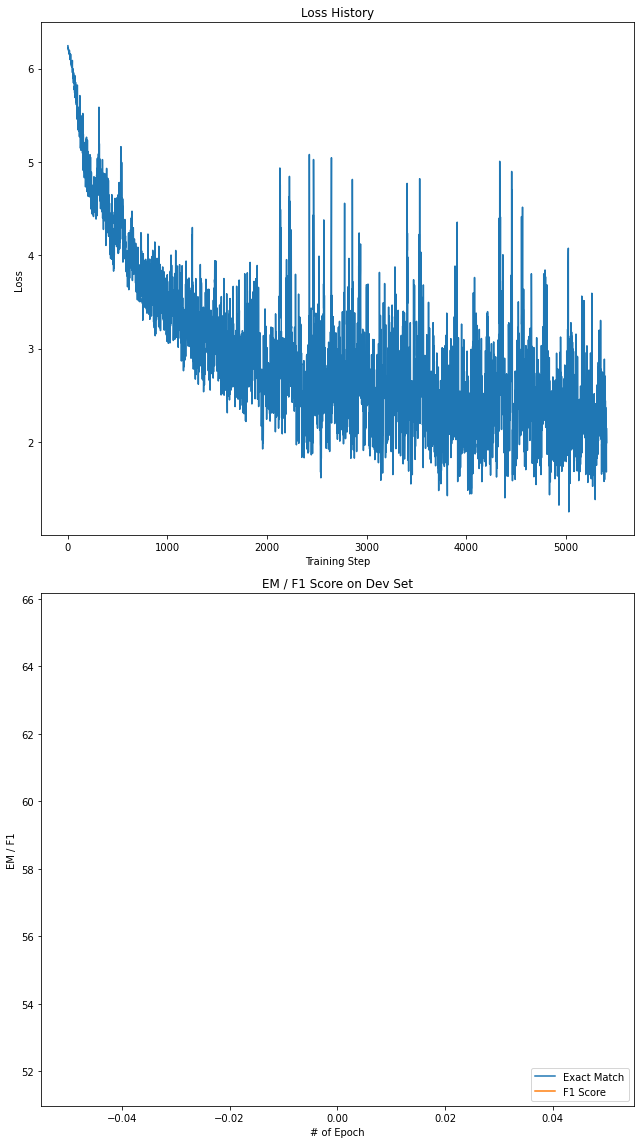

In [24]:
# Plotting EM/F1 works for more than 1 epoch
# metrics
print("EM: {:.4f}, F1: {:.4f}".format(list_em[-1], list_f1[-1])) 
fig, ax = plt.subplots(2, 1, tight_layout=True, figsize=(9,16))
ax[0].plot(list_loss)
ax[0].set_title("Loss History")
ax[0].set_ylabel("Loss")
ax[0].set_xlabel("Training Step")
ax[1].plot(list_em, label='Exact Match')
ax[1].plot(list_f1, label='F1 Score')
ax[1].set_title("EM / F1 Score on Dev Set")
ax[1].set_ylabel("EM / F1")
ax[1].set_xlabel("# of Epoch")
ax[1].legend(loc='lower right')
plt.savefig("plots_hw6.png", dpi=300)
plt.show()


# Sharing your model with the community
Hoorayy!!! 🥳 🎉 You created and evaluated a QA model. It would be a shame if you don't share it with the community... It can be super useful for others' research and you can become famous!! Some QA models have 1 million downloads (https://huggingface.co/deepset/roberta-base-squad2), this can be your model! ;) So let's upload it. Don't forget to write a brief description of you model in the model card and also its EM and F1 score! Try to add as much metadata as possible. This can be very helpful for others. You can use this as a template: https://huggingface.co/docs/hub/models-cards

In [25]:
notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [27]:
# Dataset has to be changed, depending on the task
model.push_to_hub(model_name + "-squad")
tokenizer.push_to_hub(model_name + "-squad")
# You can check out https://huggingface.co/SebOchs/xtremedistil-l6-h256-uncased-squad for the model card.

/usr/local/lib/python3.7/dist-packages/huggingface_hub/utils/_deprecation.py:43: FutureWarning: Pass token='xtremedistil-l6-h256-uncased-squad' as keyword args. From version 0.8 passing these as positional arguments will result in an error
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/huggingface_hub/hf_api.py:644: FutureWarning: `create_repo` now takes `token` as an optional positional argument. Be sure to adapt your code!
  FutureWarning,
Cloning https://huggingface.co/SebOchs/xtremedistil-l6-h256-uncased-squad into local empty directory.


Upload file pytorch_model.bin:   0%|          | 3.34k/48.4M [00:00<?, ?B/s]

To https://huggingface.co/SebOchs/xtremedistil-l6-h256-uncased-squad
   655bbb7..5c62960  main -> main

   655bbb7..5c62960  main -> main

To https://huggingface.co/SebOchs/xtremedistil-l6-h256-uncased-squad
   5c62960..f7314d2  main -> main

   5c62960..f7314d2  main -> main



'https://huggingface.co/SebOchs/xtremedistil-l6-h256-uncased-squad/commit/f7314d2e4142f9856f6e5ffad11cedd97bd0cb2d'

# Deploying your model on UKP-SQuARE
The UKP lab@ TU Darmstadt is developing a QA platform to ease the analysis, research, and development of QA models. Create an account on square.ukp-lab.de and deploy your model. You don't need to write any code for this, just the id of your model in HuggingFace's Hub. Once you have it deployed, play with your model and compare it the other publicly available models. 

You should show some screenshots in your reports comparing your model with any other available model on SQuARE.

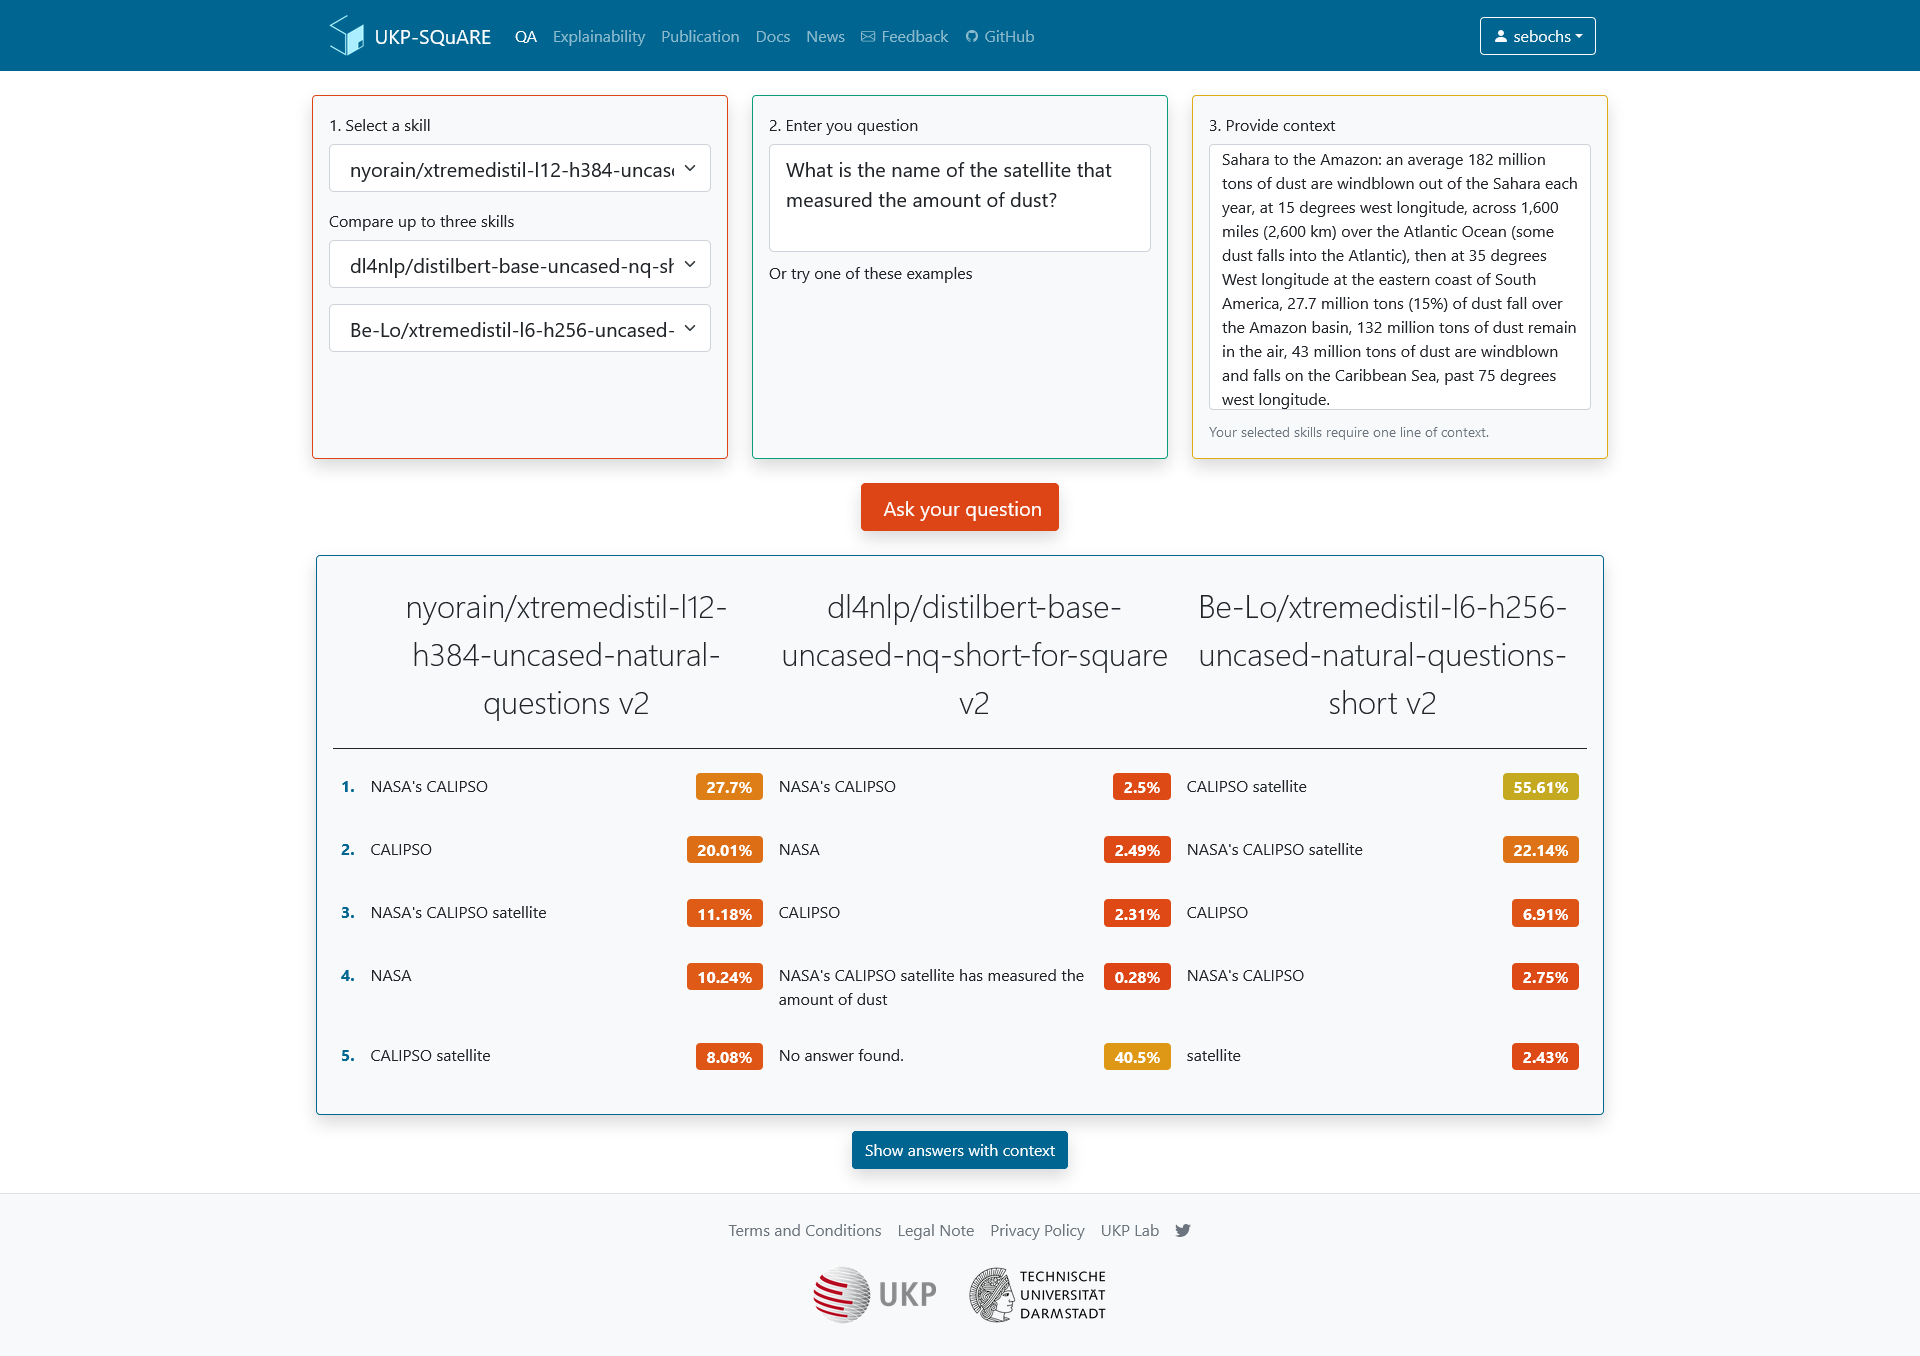